<a href="https://colab.research.google.com/github/amandasbassani/Notebooks_Processamento_Digital_de_Imagens/blob/main/Lista_1_Amanda_Schneider_Bassani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1ª Lista de Exercícios de Processamento Digital de Imagens - 2022-1 (Graduação)
### Aluno(a): Amanda Schneider Bassani
### Data de Entrega: 22/06/2022


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
from PIL import Image

## Questão 1

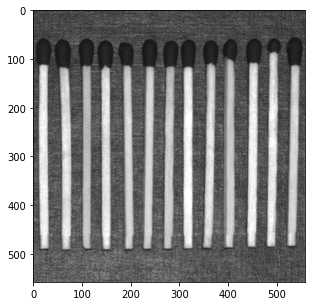

(558, 558)

In [ ]:
# Carrega a imagem original
im = np.array(plt.imread('/content/Fig8.02.jpg'))
plt.figure(figsize = (5,5))
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
plt.show() 
im.shape


<BarContainer object of 256 artists>

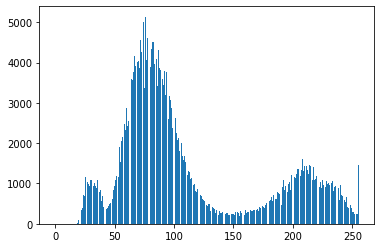

In [ ]:
# Geração do histograma

def histograma(image):
    vet = np.zeros(256, dtype=np.uint64)
    for pixel in image.ravel():
        vet[pixel] = vet[pixel]+1
    return vet

plt.bar(range(0,256),histograma(im))

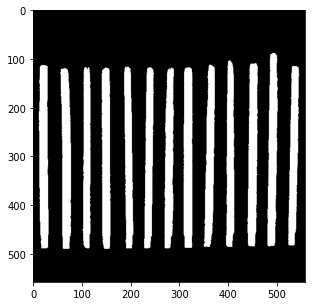

In [ ]:
# Binarização da imagem

def binary_image(image,threshold):
    image_bin = np.empty_like(image)
    for l in range(0,len(image)):
        for c in range(0,len(image)):
            if threshold >= image[l][c]:
                image_bin[l][c] = 0
            else:
                image_bin[l][c] = 255
    return image_bin

T = 160                            # escolha do valor de limiar
bin_image = binary_image(im,T)
plt.figure(figsize = (5,5))
plt.imshow(bin_image,cmap='gray',vmin=0,vmax=255)
plt.show() 

In [ ]:
# Contagem dos palitos

def stick_counter(image):
    centered_line = image[int(len(image)/2),:]
    counter = 0
    for i in range(0,len(image)):
        if centered_line[i] == 255:
            if centered_line[i-1] == 0:
                counter = counter + 1
    return counter     

print("Existem ", stick_counter(bin_image), " palitos na imagem.")

Existem  13  palitos na imagem.


In [ ]:
# Área dos palitos

def stick_areas(image):
    number_sticks = stick_counter(image)
    x_grid = int(len(image)/number_sticks)
    areas = np.zeros(number_sticks)
    for i in range(0,number_sticks):
        offset = i*x_grid
        count_pixel = 0
        for c in range(i*x_grid,i*x_grid+x_grid):
            for l in range(0,len(image)):
                if image[l][c] == 255:
                    count_pixel = count_pixel + 1
        areas[i] = count_pixel
    return areas

areas = stick_areas(bin_image).astype(int)
print("As áreas dos palitos em pixels são, respectivamente, ",areas[0],", ",
      areas[1],", ", areas[2],", ", areas[3],", \n", areas[4],", ", areas[5],
", ", areas[6],", ", areas[7],", ", areas[8],", ", areas[9],", ", areas[10],
", ", areas[11],", ", areas[12],".")


As áreas dos palitos em pixels são, respectivamente,  6336 ,  6382 ,  5171 ,  6057 , 
 5342 ,  5465 ,  5736 ,  6418 ,  5778 ,  5419 ,  6351 ,  6421 ,  5647 .


### Comentários
A solução proposta consiste em primeiramente gerar o histograma da imagem com a função criada *histograma()* para verificar qual valor de intensidade será melhor para escolhe do threshold na binarização da imagem. Aproximadamente na intensidade 150 há uma queda na quantidade de pixels existentes na imagem, sendo essa região uma boa escolha de threshold.

Portanto foi escolhido threshold de 160 e feita a binarização da imagem com a função *binary_image()*. 

A contagem dos palitos é feita na função *stick_counter()* e funciona através da escolha da linha horizontal do meio da imagem como pixels de referência para descobrir quando se passa de um pixel com valor 0 para um com valor 255. Funciona como o detector de borda de subida no estudo de sinais. Passando por todos os valores da linha ele verifica se o pixel vale 255 e se vale, verifica o pixel anterior se vale 0. Sendo True, adiciona 1 ao contador. Ao final, temos o numero de palitos retornado.

Para calcular a área dos palitos, dividimos a imagem em partes iguais de acordo com o valor encontrado em *stick_counter()* em uma grade com barras verticais. O tamanho das divisões da grade é guardado na variável x_grid. O primeiro for vai variando o offset do início da parte da grade em que será feita a verificação de numero de pixels. No segundo for ele estipula os limites da região em foco e o terceiro for conta quantos pixels estão naquela região. No final é retornado um vetor contendo os valores das áreas em suas respectivas posições.

## Questão 2

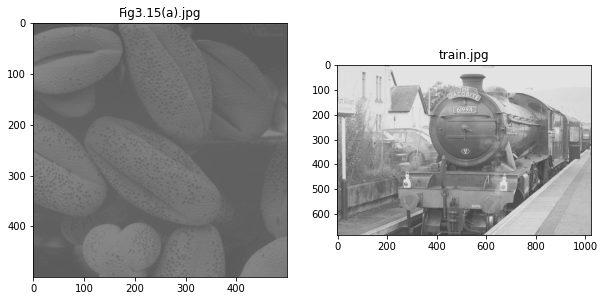

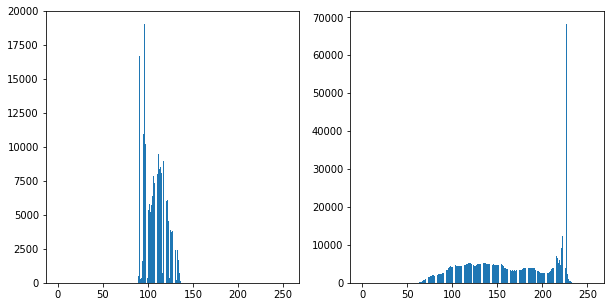

A média e a variância amostral da imagem Fig3.15(a).jpg sem equalização são respectivamente 109 e 11
A média e a variância amostral da imagem train.jpg sem equalização são respectivamente 161 e 47


In [ ]:


# Funções de média e variância
def mean(image):
    MN = image.shape[0] * image.shape[1]
    vet = image.ravel()
    mean = round(vet.sum()/MN)
    return mean

def variance(image):
    MN = image.shape[0] * image.shape[1]
    vet = image.ravel()
    variance = round(np.sqrt(((vet-((vet.sum()/MN)))**2).sum()/(MN-1)))
    return variance

# Carrega e plota as imagens originais
im1 = np.array(plt.imread('/content/Fig3.15(a).jpg'))
im2 = np.array(plt.imread('/content/train.jpg'))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(im1,cmap='gray',vmin=0,vmax=255)
axs[1].imshow(im2,cmap='gray',vmin=0,vmax=255)
axs[0].set_title('Fig3.15(a).jpg')
axs[1].set_title('train.jpg');
plt.show() 

# Plot de histogramas sem equalização
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].bar(range(0,256),histograma(im1))
axs[1].bar(range(0,256),histograma(im2))
plt.show() 

# Printa média e variância amostral

print('A média e a variância amostral da imagem Fig3.15(a).jpg sem equalização são respectivamente', mean(im1), 'e', variance(im1))
print('A média e a variância amostral da imagem train.jpg sem equalização são respectivamente',  mean(im2), 'e', variance(im2))


In [ ]:
# Equalização global de histograma

def equalize(image):

    hist = histograma(image)
    image_eq = np.zeros(image.shape)
    cdf = np.cumsum(hist)
    s = ((cdf - 0) / (image.shape[0]*image.shape[1] - 0)) * 255
    s = np.round(s)
    image_eq = s[image].astype(np.uint64)
    return image_eq
                                  

In [ ]:
# Imagens equalizadas globalmente e seus histogramas

im_eq1 = equalize(im1)
eq1 = histograma(im_eq1)
im_eq2 = equalize(im2)
eq2 = histograma(im_eq2)


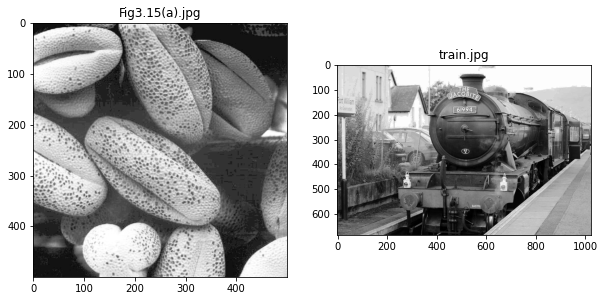

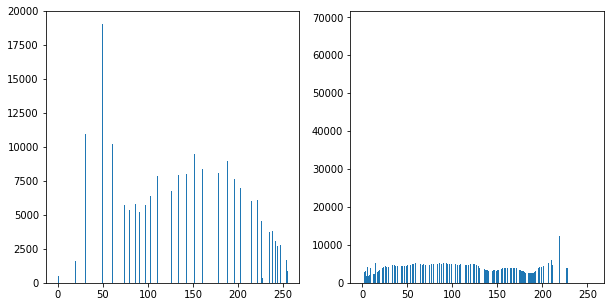

A média e a variância amostral da imagem Fig3.15(a).jpg com equalização global são respectivamente 132 e 72
A média e a variância amostral da imagem train.jpg com equalização global são respectivamente 129 e 75


In [ ]:
# Plot das imagens

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].imshow(im_eq1,cmap='gray',vmin=0,vmax=255)
axs[1].imshow(im_eq2,cmap='gray',vmin=0,vmax=255)
axs[0].set_title('Fig3.15(a).jpg')
axs[1].set_title('train.jpg');
plt.show() 

# Plot dos histogramas

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].bar(range(0,256),eq1)
axs[1].bar(range(0,256),eq2)
plt.show() 

# Printa média e variância amostral

print('A média e a variância amostral da imagem Fig3.15(a).jpg com equalização global são respectivamente', mean(im_eq1), 'e', variance(im_eq1))
print('A média e a variância amostral da imagem train.jpg com equalização global são respectivamente',  mean(im_eq2), 'e', variance(im_eq2))


In [ ]:
# Equalização local de histograma

def equalize_local(image):
        window = np.zeros((7,7), dtype=np.uint64)
        image_eq = np.zeros((image.shape[0]-6,image.shape[1]-6),dtype=np.uint64)
        for l in range(0,image_eq.shape[0]):
            for c in range(0,image_eq.shape[1]):
                window = image[l:l+7,c:c+7]
                win_eq = equalize(window)
                image_eq[l,c] = win_eq[3][3]
        return image_eq

In [ ]:
# Imagens equalizadas localmente e seus histogramas

im_eq3 = equalize_local(im1)
eq3 = histograma(im_eq3)
im_eq4 = equalize_local(im2)
eq4 = histograma(im_eq4)


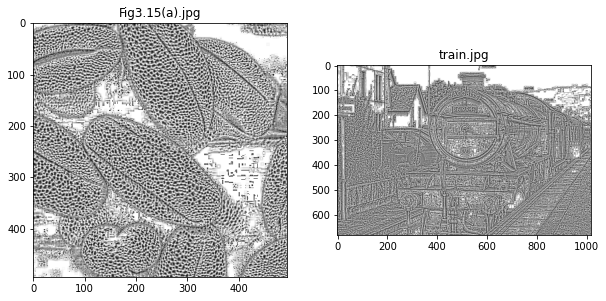

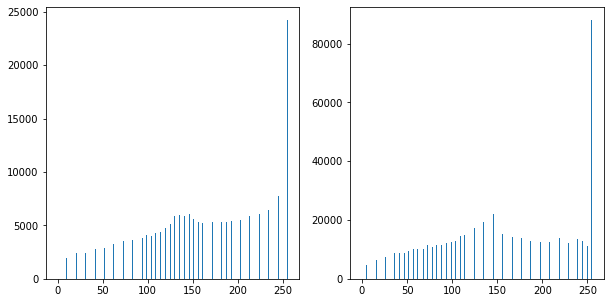

A média e a variância amostral da imagem Fig3.15(a).jpg com equalização local são respectivamente 161 e 71
A média e a variância amostral da imagem train.jpg com equalização local são respectivamente 154 e 72


In [ ]:
# Plot das imagens

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].imshow(im_eq3,cmap='gray',vmin=0,vmax=255)
axs[1].imshow(im_eq4,cmap='gray',vmin=0,vmax=255)
axs[0].set_title('Fig3.15(a).jpg')
axs[1].set_title('train.jpg');
plt.show() 

# Plot dos histogramas

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].bar(range(0,256),eq3)
axs[1].bar(range(0,256),eq4)
plt.show() 

# Printa média e variância amostral

print('A média e a variância amostral da imagem Fig3.15(a).jpg com equalização local são respectivamente', mean(im_eq3), 'e', variance(im_eq3))
print('A média e a variância amostral da imagem train.jpg com equalização local são respectivamente',  mean(im_eq4), 'e', variance(im_eq4))


### Comentários

1.   Sem equalização:

Na primeira imagem as intensidades se encontram muito concentradas entre 80 e 140 aporximadamente. A segunda imagem apresenta uma boa distribuição, mas é como se fosse em "pacotes" de intensidades, percebemos que por um intervalo de tempo são intesidades bem semelhantes e há um pequeno salto em que não há pixels de certos valores de intensidade entre os intervalos. Temos ainda um pico por volta na intesidade de 225 em que alcança perto dos 65000 pixels.

2.   Equalização global:

Percebemos um aumenta da variância amostral em relação às imagens sem equalização, pois as intensidades se encontram mais espaçadas nos dois casos. O contraste das imagens foi melhorado em razão desse efeito de equalização, em que se dispõe de uma gama maior de cores para descrever a imagem.

3.   Equalização local:

A variância não foi tão modificada em relação à equalização global, porém a média aumentou consideravelmente principalmente porque a faixa de intensidade da imagem se extende cada vez em maior quantidade quando se aproxima das altas intesidades. Por isso que enxergamos a imagem mais escura em geral e só o fundo mais claro. Além disso, temos mais intervalos de intensidades inexistentes na imagem e a intensidades são mais pontuais.


## Questão 3

In [ ]:
# Carrega imagem original e aplica o padding

im = np.array(plt.imread('/content/lena.tif'))
im = np.pad(im,1,'reflect')



In [ ]:
# Função para convolução usando máscara NxN

def convolution(image,mask):
    mask = np.flip(mask) # máscara rotacionada 180 graus
    cropped_image = np.zeros(((image.shape[0]-2*mask.shape[0]//2),(image.shape[1]-2*mask.shape[1]//2)))
    for l in range(cropped_image.shape[0]):
        for c in range(cropped_image.shape[1]):
            result = np.multiply(image[l:l+mask.shape[0],c:c+mask.shape[1]], mask)
            cropped_image[l,c] = np.sum(result)
    return cropped_image


In [ ]:
# Filtro bassa-baixas

def mean_filter(image,N):
    mask = 1/N**2 * np.ones((N,N))
    filtered_image = convolution(image,mask)
    return filtered_image

# Filtro laplaciano

def laplace_filter(image):
    mask = [[0, 1, 0],[1, -4, 1],[0, 1, 0]]
    filtered_image = convolution(image,mask)
    return filtered_image

# Filtro de Sobel

def sobel_filter(image):
    gx = [[-1,-2,-1],[0,0,0],[1,2,1]]
    gy = [[-1,0,1],[-2,0,2],[-1,0,1]]
    convx = convolution(image,gx)
    convy = convolution(image,gy)
    filtered_image = np.sqrt(convx**2+convy**2)
    return filtered_image



(514, 514)
(511, 511)


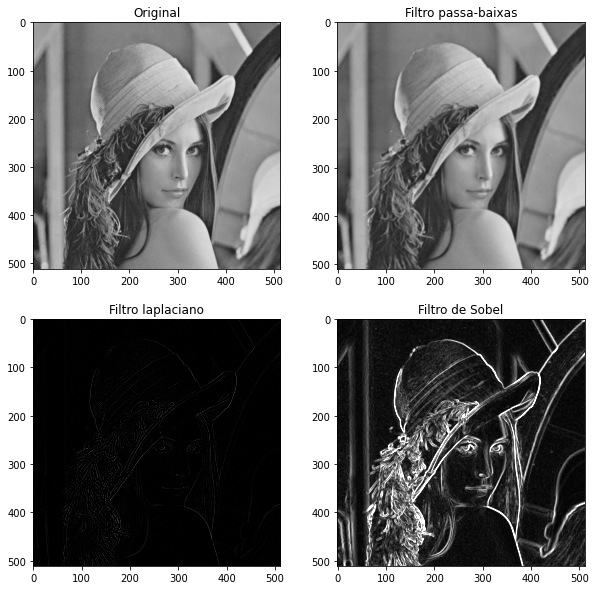

In [ ]:
# Plot das imagens
print(im.shape)
print(mean_filter(im,3).shape)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs[0][0].imshow(im,cmap='gray',vmin=0,vmax=255)
axs[0][1].imshow(mean_filter(im,3),cmap='gray',vmin=0,vmax=255)
axs[1][0].imshow(laplace_filter(im),cmap='gray',vmin=0,vmax=255)
axs[1][1].imshow(sobel_filter(im),cmap='gray',vmin=0,vmax=255)
axs[0][0].set_title('Original')
axs[0][1].set_title('Filtro passa-baixas');
axs[1][0].set_title('Filtro laplaciano')
axs[1][1].set_title('Filtro de Sobel');
plt.show() 



### Comentários

Para a imagem não ser cortada em relação a imagem original, é aplicado o padding, que consiste em uma borda espelhada da imagem de tamanho equivalente à metade da dimensão da máscara arredondada para baixo. Dessa forma a máscara consegue passar pela imagem toda sem haver a necessidade de cortar a imagem final.

Analisando os resultados, percebemos com clareza a finalidade de cada filtro. O filtro de média torna a imagem mais suavizada, dando até um aspecto embaçado para a imagem, já que é feito a partir da média dos valores encontrados na máscar a cada iteração. Já o filtro laplaciano consegue mostrar apenas as bordas da imagem, pois é um filtro espacial passa alta baseado na diferenciação com objetivo de salientar transições de intensidade. A imagem gerada ao passar pelo filtro de Sobel preserva as mudanças de intensidade, mas perda sua prorpiedade isotrópica, de forma que permite uma exibição de bordas com muito mais contraste do que apresentado no filtro laplaciano.

## Questão 4

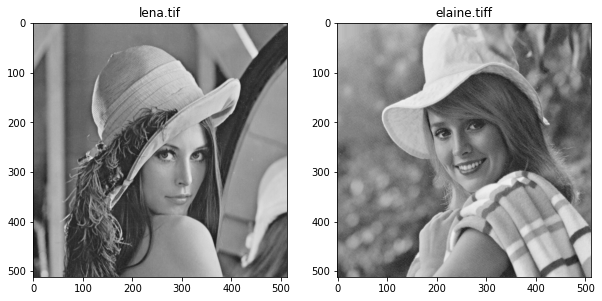

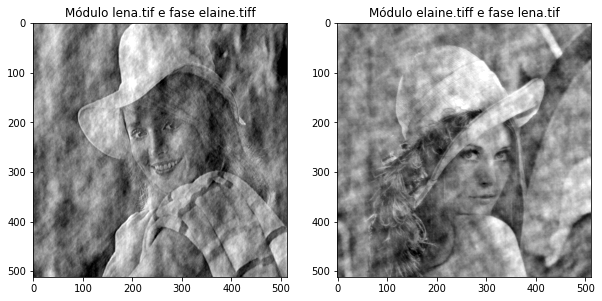

In [ ]:
im1 = np.array(plt.imread('/content/lena.tif'))
im2 = np.array(plt.imread('/content/elaine.tiff'))

def switch_phases(image1, image2):
    F1 = np.fft.fft2(image1)
    F2 = np.fft.fft2(image2)

    omega1 = np.abs(F1)
    phi1 = np.angle(F1)
    omega2 = np.abs(F2)
    phi2 = np.angle(F2)

    F1switched = omega1*np.exp(1j*phi2)
    F2switched = omega2*np.exp(1j*phi1)

    im1switched = np.real(np.fft.ifft2(F1switched))
    im2switched = np.real(np.fft.ifft2(F2switched))

    return im1switched, im2switched

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(im1,cmap='gray',vmin=0,vmax=255)
axs[1].imshow(im2,cmap='gray',vmin=0,vmax=255)
axs[0].set_title('lena.tif')
axs[1].set_title('elaine.tiff');
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(switch_phases(im1,im2)[0],cmap='gray',vmin=0,vmax=255)
axs[1].imshow(switch_phases(im1,im2)[1],cmap='gray',vmin=0,vmax=255)
axs[0].set_title('Módulo lena.tif e fase elaine.tiff')
axs[1].set_title('Módulo elaine.tiff e fase lena.tif');
plt.show()


### Comentários
A imagem *Módulo lena.tif e fase elaine.tiff* apresenta características mais perceptíveis a olho da imagem *elaine.tiff* do que da imagem *lena.tif* e o mesmo vale para a imagem *Módulo elaine.tiff e fase lena.tif*, onde percebemos mais características da imagem *lena.tif*. Isso só comprova que a fase da transformada de fourier detém grande parte da informação de uma imagem.

## Questão 5

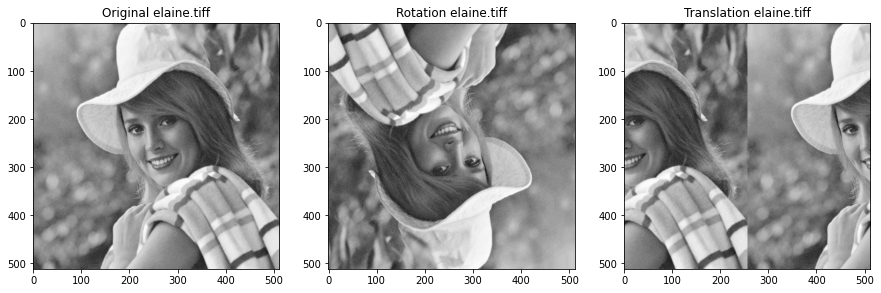

In [ ]:
im = np.array(plt.imread('/content/elaine.tiff'))

def rotation(image):
    F = np.fft.fft2(image)
    omega = np.abs(F)
    phi = np.angle(F)
    rotF = np.conj(omega*np.exp(1j*phi))
    rotIm = np.real(np.fft.ifft2(rotF))
    return rotIm 

def translation(image):
    F = np.fft.fft2(image)
    for u in range(F.shape[0]):
        for v in range(F.shape[1]):
            F[u][v] *= np.exp(-2j*np.pi*v/2)
    transIm = np.real(np.fft.ifft2(F))
    return transIm

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
axs[0].imshow(im,cmap='gray')
axs[1].imshow(rotation(im),cmap='gray')
axs[2].imshow(translation(im),cmap='gray')
axs[0].set_title('Original elaine.tiff')
axs[1].set_title('Rotation elaine.tiff');
axs[2].set_title('Translation elaine.tiff');
plt.show()



### Comentários

A metodologia proposta para a primeira situação se baseia em uma propriedade de simetria da DFT 2-D (linha 5 da Tabela 4.1 do livro-texto) que consiste em encontrar o conjugado da F(u,v) para que no espaço se tenha um f(-x,-y), ou seja, uma imagem de ponta a cabeça.

A metodologia proposta para a segunda situação se baseia na propriedade de translação (linha 3 da Tabela 4.3 do livro-texto) que consiste em:
$$f(x-x_0,y-y_0) \Leftrightarrow  F(u,v)e^{-j2\pi(u\cdot x_0/M+v\cdot y_0/N)}$$
Porém já substituindo para transladar apenas no eixo horizontal até a metade da imagem, temos a expressão simplificada, como $y_0 = N/2$ e $x_0 = 0$: 
$$f(x,y-N/2) \Leftrightarrow  F(u,v)e^{-j2\pi v /2}$$ 

## Questão 6

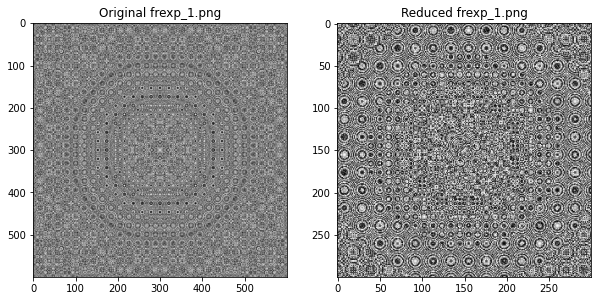

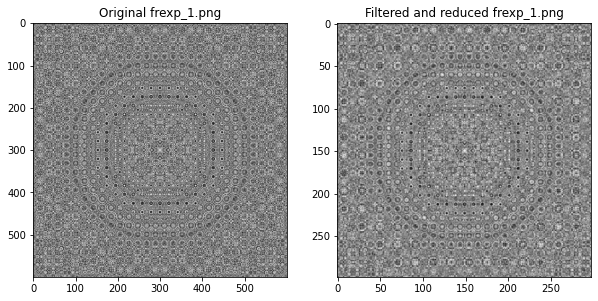

In [ ]:
im = np.array(plt.imread('/content/frexp_1.png'))

reduced_im = im[0:-1:2,0:-1:2]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(im,cmap='gray')
axs[1].imshow(reduced_im,cmap='gray')
axs[0].set_title('Original frexp_1.png')
axs[1].set_title('Reduced frexp_1.png');
plt.show()


# Aplicando um filtro de suavização

reduced_im = mean_filter(im,3)[0:-1:2,0:-1:2]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(im,cmap='gray')
axs[1].imshow(reduced_im,cmap='gray')
axs[0].set_title('Original frexp_1.png')
axs[1].set_title('Filtered and reduced frexp_1.png');
plt.show()

### Comentários
Na imagem *Reduced frexp_1* ocorreu o chama efeito aliasing. Esse efeito pode ser reduzido utilizando filtros passa-baixas, ocorrendo assim um borramento da imagem. Isso porque o filtro permite a atenuação de altas frequências. Uma vez ocorrido o efeito de aliasing, ele não pode ser desfeito, apenas evitado fazendo o “borramento” da imagem antes da amostragem da função.

Podemos perceber que na imagem *Filtered and reduced frexp_1* não temos mais esse efeito por conta do borramento realizado antes da redução. Dessa forma, essa ultima imagem representa muito mais a imagem original do que a que apenas foi reduzida sem filtragem.



## Questão 7

In [ ]:
from typing import Match
im = Image.open('/content/original.tif').convert('L')
im = np.array(im)
im1 = np.array(plt.imread('/content/ruidosa1.tif'))
im2 = np.array(plt.imread('/content/ruidosa2.tif'))

def psnr_calc(original, noise):
    height = original.shape[0]
    width = original.shape[1]
    original = np.array(original, dtype=float)
    noise = np.array(noise, dtype=float)
    mse = ((original - noise)**2 / (height * width)).sum()
    psnr = 20 * np.log10(255/np.sqrt(mse))
    psnr = np.around(psnr,2)
    return psnr


In [ ]:
# Filtro de média

def mean_filter(image,N):
    mask = 1/N**2 * np.ones((N,N))
    image = np.delete(image,(1), axis = 0)
    image = np.delete(image,(1), axis = 1)
    pad = 3
    padded_image = np.pad(image, pad_width=pad, mode='reflect')
    filtered_image = convolution(padded_image,mask)
    return filtered_image



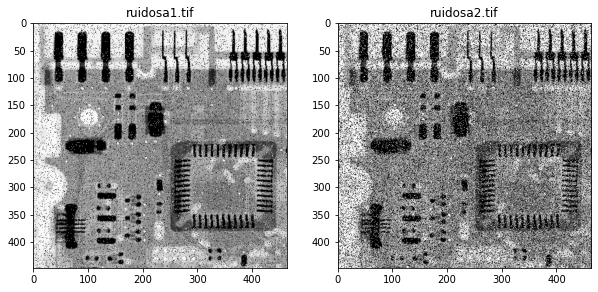

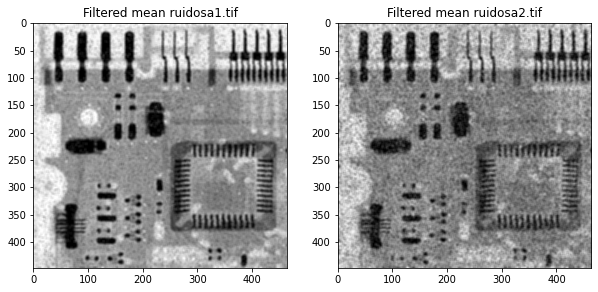

O PSNR da ruidosa1.tif em relação a imagem original é 14.38
O PSNR da ruidosa2.tif em relação a imagem original é 9.64
O PSNR da Filtered mean ruidosa1.tif em relação a imagem original é 20.79
O PSNR da Filtered mean ruidosa2.tif em relação a imagem original é 16.33


In [ ]:
# Plot das imagens

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(im1,cmap='gray')
axs[1].imshow(im2,cmap='gray')
axs[0].set_title('ruidosa1.tif');
axs[1].set_title('ruidosa2.tif');
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(mean_filter(im1,5),cmap='gray')
axs[1].imshow(mean_filter(im2,5),cmap='gray')
axs[0].set_title('Filtered mean ruidosa1.tif')
axs[1].set_title('Filtered mean ruidosa2.tif');
plt.show()

print('O PSNR da ruidosa1.tif em relação a imagem original é',psnr_calc(im,im1))
print('O PSNR da ruidosa2.tif em relação a imagem original é',psnr_calc(im,im2))
print('O PSNR da Filtered mean ruidosa1.tif em relação a imagem original é',psnr_calc(im,mean_filter(im1,5)))
print('O PSNR da Filtered mean ruidosa2.tif em relação a imagem original é',psnr_calc(im,mean_filter(im2,5)))

In [ ]:
# Filtro de mediana

def median_filter(image, N):
    mask = np.ones((N,N))
    pad = N // 2
    padded_image = np.pad(image, pad_width=pad, mode='reflect')
    median_image = np.zeros(image.shape, dtype=np.uint8)
    mask = np.flip(mask)
    for l in range(image.shape[0]):
        for c in range(image.shape[1]):
            new_pixel_value = np.median(mask * padded_image[l:l+mask.shape[0], c:c+mask.shape[0]])
            median_image[l,c] = new_pixel_value  
    return median_image


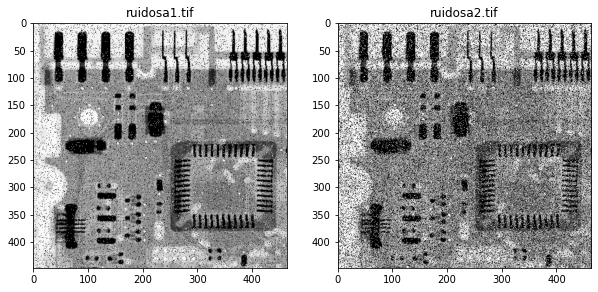

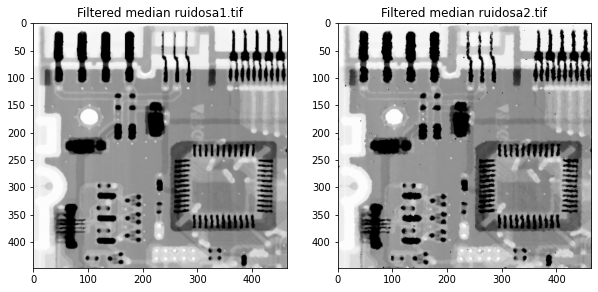

O PSNR da Filtered mean ruidosa1.tif em relação a imagem original é 25.65
O PSNR da Filtered mean ruidosa2.tif em relação a imagem original é 22.03


In [ ]:
# Plot das imagens

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(im1,cmap='gray')
axs[1].imshow(im2,cmap='gray')
axs[0].set_title('ruidosa1.tif');
axs[1].set_title('ruidosa2.tif');
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(median_filter(im1,5),cmap='gray')
axs[1].imshow(median_filter(im2,5),cmap='gray')
axs[0].set_title('Filtered median ruidosa1.tif')
axs[1].set_title('Filtered median ruidosa2.tif');
plt.show()

print('O PSNR da Filtered mean ruidosa1.tif em relação a imagem original é',psnr_calc(im,median_filter(im1,5)))
print('O PSNR da Filtered mean ruidosa2.tif em relação a imagem original é',psnr_calc(im,median_filter(im2,5)))

In [ ]:
# Filtro Butterworth

def butterworth_filter(image,ordem,threshold):
    P = 2*image.shape[0]
    Q = 2*image.shape[1] # parâmetros de preenchimento P e Q adotados como 2M e 2N
    im_fill = np.zeros((P,Q)) 
    im_fill[0:image.shape[0],0:image.shape[1]] = image
    F_shift = np.fft.fftshift(np.fft.fft2(im_fill))
    y = np.arange(-image.shape[0], image.shape[0], 1)
    x = np.arange(-image.shape[1], image.shape[1], 1)
    u, v = np.meshgrid(x, y)
    D = np.sqrt(u**2 + v**2)
    D0 = threshold
    H_but = np.zeros((2*im2.shape[0],2*im2.shape[1]))
    H_but = 1/(1+(D/D0)**(2*ordem))
    G_but = F_shift*H_but
    im_but_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_but)))
    but_image = im_but_fill[0:im2.shape[0],0:im2.shape[1]]
    return but_image


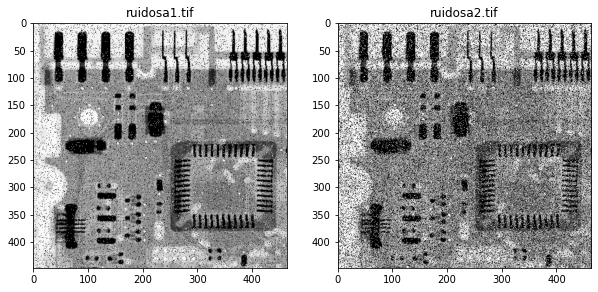

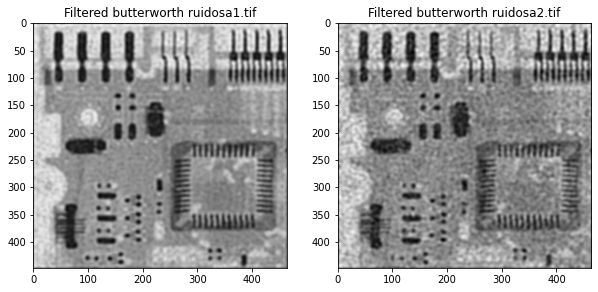

O PSNR da Filtered mean ruidosa1.tif em relação a imagem original é 20.23
O PSNR da Filtered mean ruidosa2.tif em relação a imagem original é 16.25


In [ ]:
# Plot das imagens

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(im1,cmap='gray')
axs[1].imshow(im2,cmap='gray')
axs[0].set_title('ruidosa1.tif');
axs[1].set_title('ruidosa2.tif');
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(butterworth_filter(im1,4,100),cmap='gray')
axs[1].imshow(butterworth_filter(im2,4,100),cmap='gray')
axs[0].set_title('Filtered butterworth ruidosa1.tif')
axs[1].set_title('Filtered butterworth ruidosa2.tif');
plt.show()

print('O PSNR da Filtered mean ruidosa1.tif em relação a imagem original é',psnr_calc(im,butterworth_filter(im1,4,100)))
print('O PSNR da Filtered mean ruidosa2.tif em relação a imagem original é',psnr_calc(im,butterworth_filter(im2,4,100)))

### Comentários
Todos os filtros utilizados aumentam o PSNR em relação a imagem original, o que é uma coisa boa, já que quanto maior o PSNR significa que menos o sinal é afetado pelo ruído. Eles apresentam todos valores maiores que 16, enquanto as imagens ruidosas sem PSNR abaixo de 14. 

Dentre os 3 filtros, o com melhor PSNR é o de mediana e que notavelmente podemos afirmar que é o que melhor elimina a influência de ruidos na visualização da imagem. Isso se dá principalmente da definição de mediana, em que se escolhe um ponto médio dos valores dispostos e como o ruído encontrado nas imagens é do tipo sal-pimenta (ruído que se mostra em pixels com muito altas intensidades e muito baixas intensidades) então sempre é selecionado um pixel sem ruído para representar a intensidade do pixel da imagem filtrada.

O filtro de média é um passa baixas, portanto consegue eliminar bem os ruídos do tipo "sal" (com altas frequências) porém os pimenta (pontinhos pretos na imagem) permanecem. Como a ordem do filtro butterworth é 4, então ele se assemelha do fitlro ideal em que funciona de forma bem abrupta, por isso apresenta resultado parecido com o de filtro médio.